In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("breast_cancer.csv", index_col=0) #index_col=0은 pandas.read_csv() 함수에서 CSV 파일을 읽을 때 첫 번째 열(열 인덱스 0)을 데이터프레임의 인덱스로 사용하겠다는 의미. 즉, CSV 파일의 첫 번째 열을 데이터프레임의 인덱스로 설정하고 나머지 열은 실제 데이터로 취급. 만약 index_col=0을 사용하지 않으면 기본적으로 데이터프레임은 0부터 시작하는 자동 생성된 인덱스를 사용합. 이 경우, 첫 번째 열이 특정한 식별자(예: 환자 ID 등)일 가능성이 높아 그 열을 인덱스로 사용하고 싶은 상황에서 유용합니다.

# 데이터 확인
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:

# 컬렴명 확인
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

Text(0.5, 1.0, 'Label')

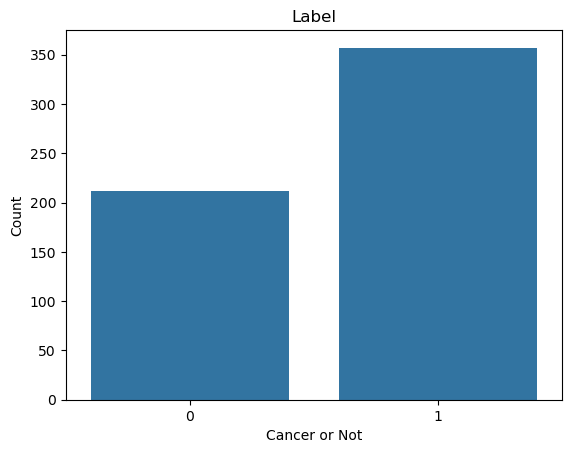

In [4]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="label") #df 데이터프레임에서 label 열의 값을 기준으로 각 레이블의 빈도수를 계산해 막대 그래프를 생성
plt.xlabel("Cancer or Not") 
plt.ylabel("Count")
plt.title("Label") #그래프의 제목을 "Label"로 설정

In [5]:
# 레이블 갯수 확인 (숫자)
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [6]:
# 결측치 확인
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [7]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

C:\Users\tyra\AppData\Local\Temp\ipykernel_10264\13223115.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mean radius'], kde = True, hist = False, ax=ax1) #이 줄은 df 데이터프레임에서 mean radius 칼럼의 분포를 그립니다. sns.distplot은 seaborn에서 제공하는 함수로, 주어진 데이터의 히스토그램과 커널 밀도 추정(KDE)을 그려줍니다.
C:\Users\tyra\AppData\Local\Temp\ipykernel_10264\13223115.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new f

<Axes: xlabel='mean texture', ylabel='Density'>

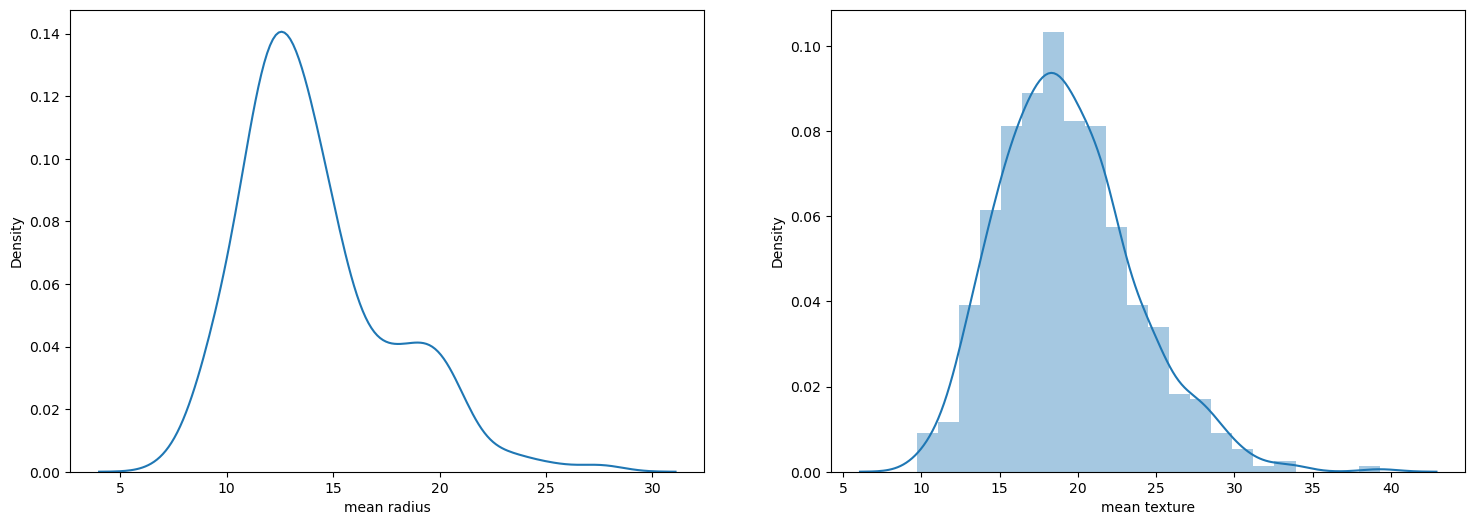

In [8]:
# 컬럼별 히스토그램 확인
# 'mean radius'와'mean texture' 칼럼을 선택

figure = plt.figure(figsize=(18,6)) #새로운 그림(Figure)을 생성하고, 그 크기를 너비 18인치, 높이 6인치로 설정합니다. 그리고 figure 변수에 이 Figure 객체를 저장
ax1 = plt.subplot(1,2,1) #plt.subplot(1,2,1)은 1행 2열짜리 서브플롯을 만들고, 그중 첫 번째(왼쪽) 서브플롯을 지정합니다. ax1는 이 서브플롯을 가리키는 객체로, 이후 그래프를 그릴 때 이 위치에 그릴 수 있게 해줍니다.
sns.distplot(df['mean radius'], kde = True, hist = False, ax=ax1) #이 줄은 df 데이터프레임에서 mean radius 칼럼의 분포를 그립니다. sns.distplot은 seaborn에서 제공하는 함수로, 주어진 데이터의 히스토그램과 커널 밀도 추정(KDE)을 그려줍니다.
ax2 = plt.subplot(1,2,2)
sns.distplot(df['mean texture'], ax=ax2)

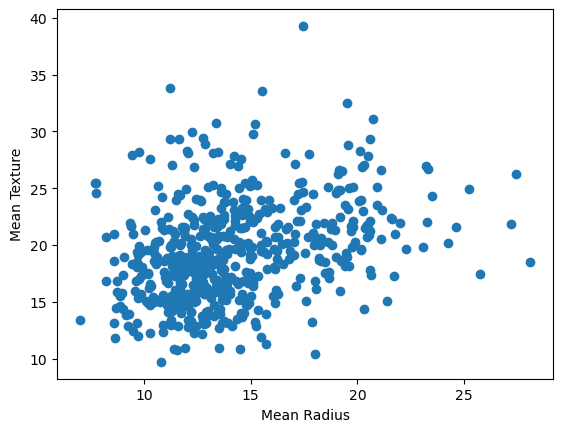

In [9]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['mean radius'], df['mean texture']) #plt.scatter()는 산점도(Scatter Plot)를 그리는 함수입니다. 여기서 df['mean radius']는 x축에 나타낼 값들을, df['mean texture']는 y축에 나타낼 값들을 의미합니다.
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')

plt.show()

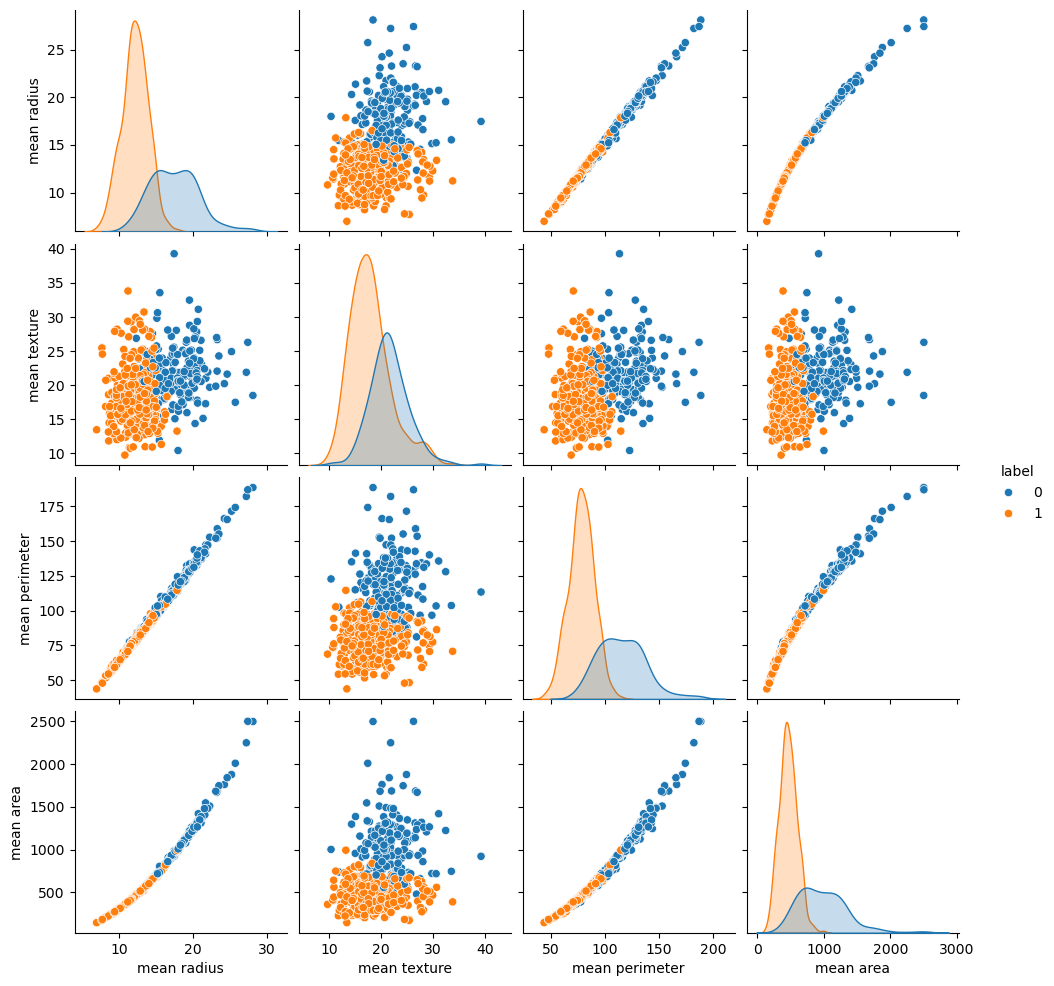

In [10]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'],
            hue ='label') #hue 파라미터는 데이터의 범주형 변수(이진 클래스)를 기준으로 그래프의 색을 다르게 설정합니다.
plt.show()

C:\Users\tyra\AppData\Local\Temp\ipykernel_10264\427903431.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="mean radius", data=df, palette="Set3")


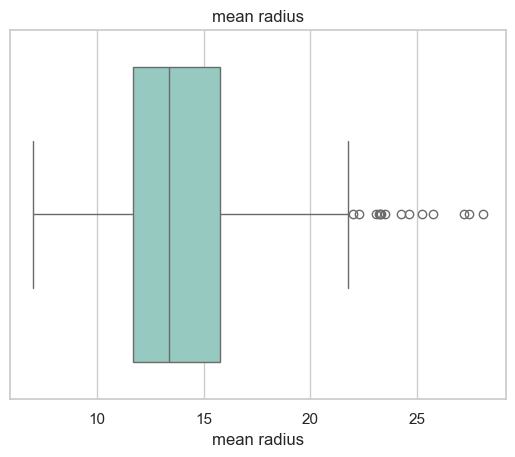

In [11]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="mean radius", data=df, palette="Set3")
plt.title("mean radius")
plt.show()

C:\Users\tyra\AppData\Local\Temp\ipykernel_10264\2283425298.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax) #df.hist()는 **데이터프레임의 각 열(Column)**에 대해 자동으로 히스토그램을 그리는 함수입니다. df에 있는 모든 수치형 컬럼에 대해 각각의 히스토그램을 생성함. ax = ax는 앞서 만든 축(ax)에 모든 히스토그램을 그리도록 설정한 부분


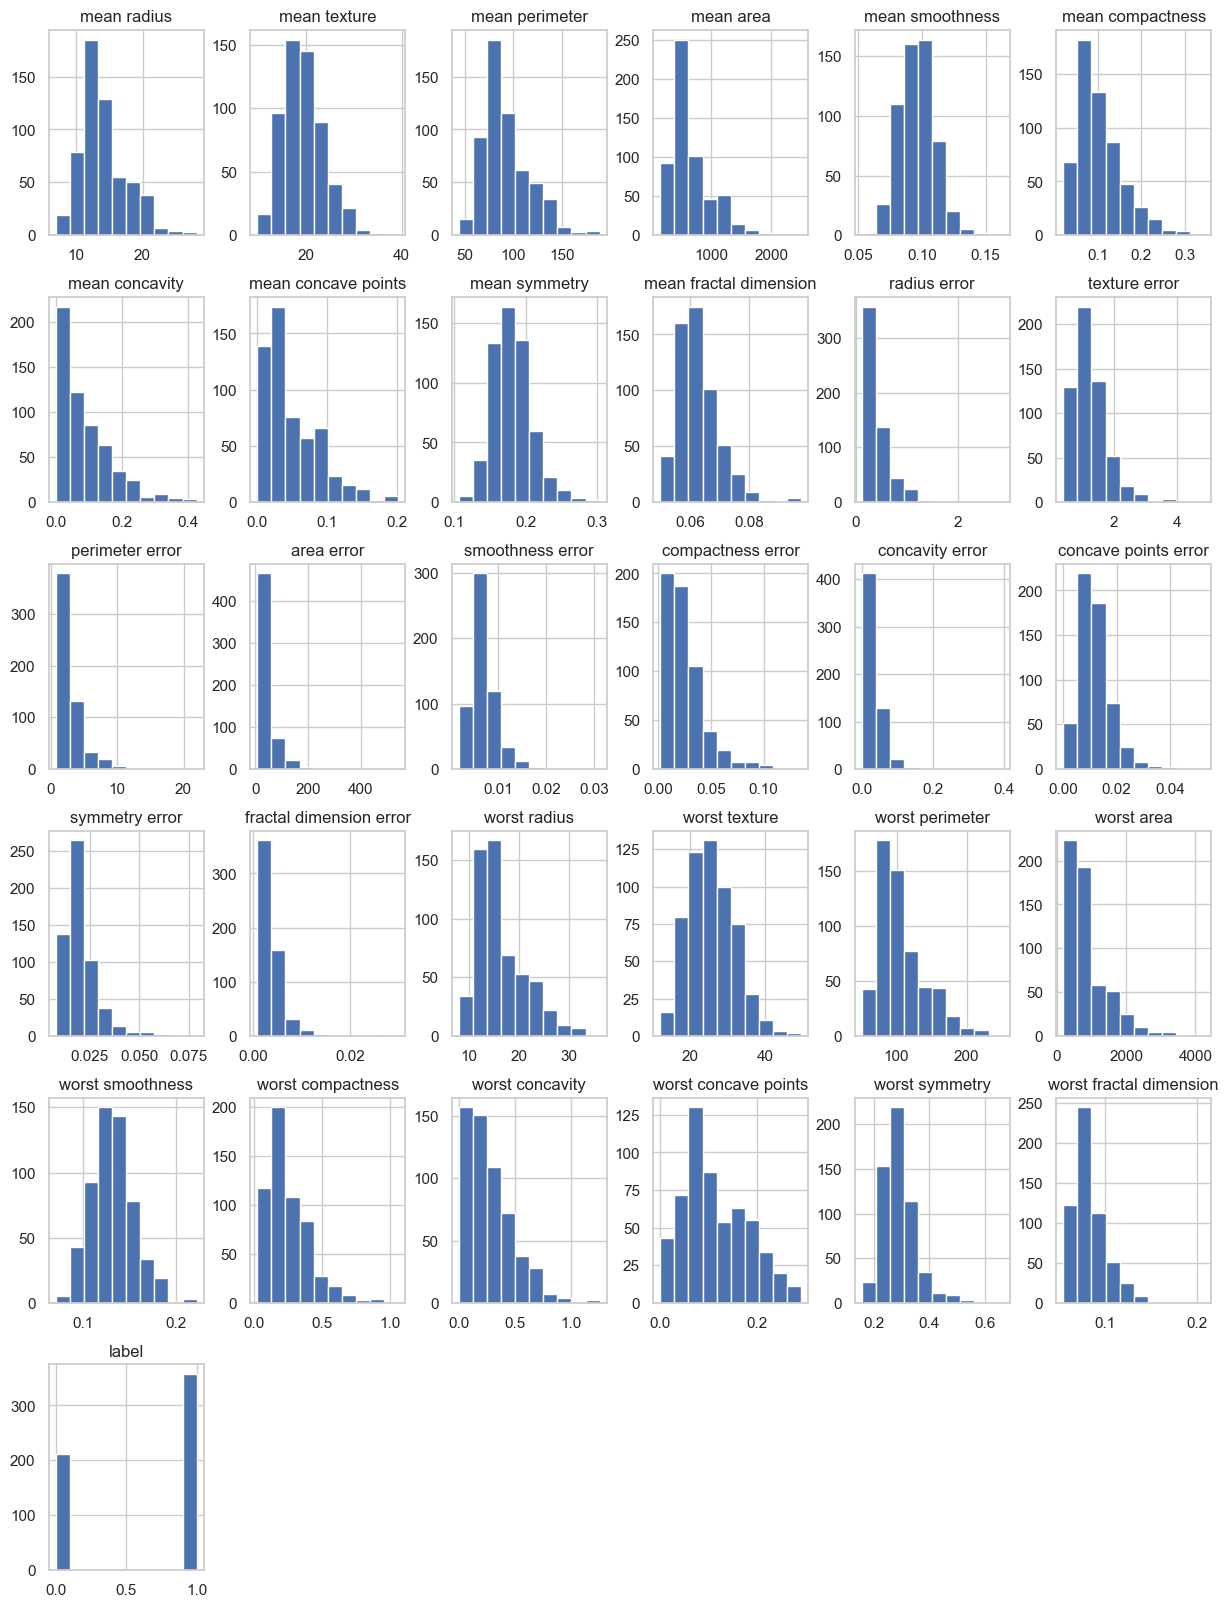

In [12]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20)) #plt.figure()는 새로운 그림(Figure)을 생성하는 함수입니다. figsize=(15,20)는 그래프의 전체 크기를 설정합니다
ax = fig.gca() #gca()는 **현재의 축(Axes)**를 반환하는 함수
df.hist(ax = ax) #df.hist()는 **데이터프레임의 각 열(Column)**에 대해 자동으로 히스토그램을 그리는 함수입니다. df에 있는 모든 수치형 컬럼에 대해 각각의 히스토그램을 생성함. ax = ax는 앞서 만든 축(ax)에 모든 히스토그램을 그리도록 설정한 부분
plt.show()

In [13]:
#df 데이터프레임에서 label 열을 제거하고, ***새로운 데이터프레임 X를 생성***한 후, 그 상위 5개의 행을 확인하는 코드

X=df.drop('label',axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df

# 새로 만든 X 데이터 프레임과 비교해보면 label의 유무로 차이가 있음

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [15]:
#df 데이터프레임에서 label 열의 값들을 추출하여 **y**라는 변수에 저장하고, label 값이 얼마나 자주 등장하는지 빈도수를 계산하는 코드

y=df['label']
y.value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [16]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [17]:
#훈련데이터와 테스트 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

#궁금했던 점
#train_test_split 함수는 데이터를 나눌 때 입력 데이터 X와 타겟 데이터 y의 행이 동일한 순서로 나눠지도록 처리합니다.
#즉, X의 각 행에 해당하는 레이블 y의 값은 그대로 유지됩니다. 이를 통해 입력 데이터와 레이블이 섞이지 않고 올바르게 대응됩니다.

#test_size=0.25는  25%는 테스트용(X_test, y_test)으로  데이터의 75%는 학습용(X_train, y_train)으로 나눈 다는 것
#random_state=0: 랜덤하게 데이터를 나누는 과정에서 시드를 고정하여, 같은 결과를 얻을 수 있도록 설정하는 값입니다.
#random_state를 설정하지 않으면 실행할 때마다 데이터가 다르게 분리될 수 있습니다.

In [18]:

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  # 분류용 KNN

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier  #다층 퍼셉트론(MLP, Multi-Layer Perceptron)을 사용한 신경망 기반 분류기를 불러옴


In [19]:
#SVM classification

from sklearn.svm import SVC

clf_svm = SVC(random_state=0) #random_state를 지정하면 모델의 무작위적인 요소가 고정되어 실행할 때마다 동일한 결과
clf_svm.fit(X_train, y_train) #X_train(입력 데이터)와 y_train(레이블 데이터)를 사용하여 학습을 수행

pred_svm = clf_svm.predict(X_test) #테스트 데이터인 X_test를 입력으로 받아, 학습된 SVM 모델이 해당 데이터에 대한 예측 결과(클래스 값)를 반환해서 pred_svm에 저장

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm)) #실제 레이블과 예측된 레이블을 넣어서 정확도를 확인해봄
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9370629370629371
[[45  8]
 [ 1 89]]


In [20]:
# Logisitc Regression classification

import warnings
warnings.filterwarnings('ignore') #요걸로 빨갛게 뜨는 warning 지울 수 있음

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9440559440559441
[[51  2]
 [ 6 84]]


In [21]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.972027972027972
[[52  1]
 [ 3 87]]


In [22]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8811188811188811
[[50  3]
 [14 76]]


In [23]:
# KNN (K-Nearest Neighbors, K 최근접 이웃) classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. KNN 모델 생성
clf_knn = KNeighborsClassifier(n_neighbors=5)  # 기본적으로 k=5로 설정, 예측할 때 가장 가까운 5개의 이웃을 기준으로 다수결 투표를 하여 분류를 수행

clf_knn.fit(X_train, y_train)

pred_knn = clf_knn.predict(X_test)

print("\n--- KNN Classifier ---")
print("Accuracy:", accuracy_score(y_test, pred_knn))  # 정확도 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_knn))  # 혼동 행렬 출력



--- KNN Classifier ---
Accuracy: 0.9370629370629371
Confusion Matrix:
 [[49  4]
 [ 5 85]]


In [24]:
#참고용
#다층 퍼셉트론(MLP)을 사용한 신경망 분류 모델

clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.9300699300699301
[[48  5]
 [ 5 85]]
